<a href="https://colab.research.google.com/github/li0ne/q-macro/blob/main/2-EconomicGrowth/GrowthAccountingver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       country  growth_rate  tfp_growth  capital_deepening  tfp_share  \
571  Australia     1.363635   -0.414640           3.651218  -0.304069   
572  Australia     6.278038    2.351975           3.301266   0.374635   
573  Australia     6.751060    2.418411           3.018351   0.358227   
574  Australia     6.324089    1.256359           3.114254   0.198662   
575  Australia     2.230489   -1.892608           2.468253  -0.848517   
576  Australia     6.181824    1.261973           2.712870   0.204143   
577  Australia     5.136991    0.655103           2.913279   0.127527   
578  Australia     7.166123    2.827370           4.258675   0.394547   
579  Australia     7.294846    2.851880           3.427085   0.390944   
580  Australia     3.965998   -0.710917           1.652906  -0.179253   

     capital_share  
571       0.855423  
572       0.173194  
573       0.151251  
574       0.163398  
575       0.353512  
576       0.142161  
577       0.186951  
578       0.199530  
579    

KeyError: 'year'

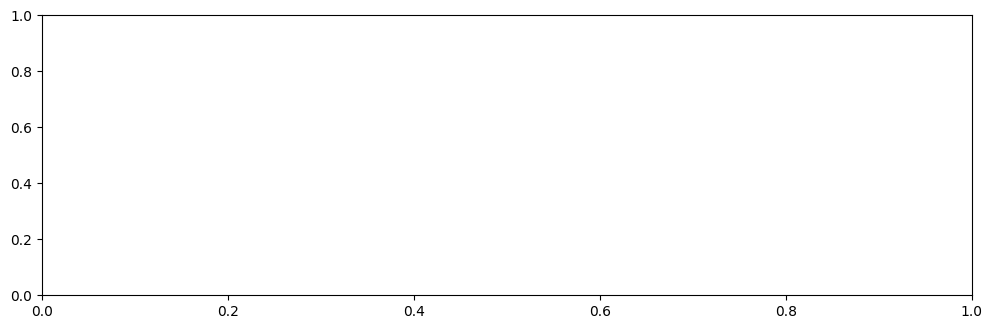

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# Load data
pwt1001 = pd.read_stata('https://dataverse.nl/api/access/datafile/354098')




# Select OECD countries
oecd_countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway',
     'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']


# Filter and select relevant columns
data_all = pwt1001.loc[pwt1001['country'].isin(oecd_countries)][['year', 'country', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
data_all = data_all.loc[(data_all['year'] >= 1960) & (data_all['year'] <= 2000)].dropna()

# Calculate additional variables
data_all['alpha'] = 1 - data_all['labsh']
data_all['y_n'] = data_all['rgdpna'] / data_all['emp']  # Y/N
data_all['hours'] = data_all['emp'] * data_all['avh']  # L
data_all['tfp_term'] = data_all['rtfpna'] ** (1 / (1 - data_all['alpha']))  # A^(1/(1-alpha))
data_all['cap_term'] = (data_all['rkna'] / data_all['rgdpna']) ** (data_all['alpha'] / (1 - data_all['alpha']))  # (K/Y)^(alpha/(1-alpha))
data_all['lab_term'] = data_all['hours'] / data_all['pop']  # L/N
data_all = data_all.sort_values(['country', 'year'])

# Calculate growth rates
data_all['growth_rate'] = data_all.groupby('country')['rgdpna'].pct_change() * 100
data_all['tfp_growth'] = data_all.groupby('country')['rtfpna'].pct_change() * 100
data_all['capital_deepening'] = (data_all['rkna'] / data_all['hours']).pct_change() * 100

# Calculate TFP Share and Capital Share
data_all['tfp_share'] = data_all['tfp_growth'] / data_all['growth_rate']
data_all['capital_share'] = (data_all['alpha'] * data_all['capital_deepening']) / data_all['growth_rate']

# Remove rows with NaN values resulted from pct_change
data_all = data_all.dropna()

# Create panel data
panel_data = data_all[[''year,'country', 'growth_rate', 'tfp_growth', 'capital_deepening', 'tfp_share', 'capital_share']]

# Print first 10 rows of panel data
print(panel_data.head(10))

# Plot data for illustration
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
for country in oecd_countries:
    country_data = panel_data[panel_data['country'] == country]
    plt.plot(country_data['year'], country_data['growth_rate'], label=country)
plt.legend()
plt.title('Growth Rate')

plt.subplot(2, 1, 2)
for country in oecd_countries:
    country_data = panel_data[panel_data['country'] == country]
    plt.plot(country_data['year'], country_data['tfp_share'], label=country)
plt.legend()
plt.title('TFP Share')

plt.tight_layout()
plt.show()







